# Analysis for H Release in GaN

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import seaborn as sb
from matplotlib.colors import LogNorm
from matplotlib import ticker
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [3]:
import matplotlib as mpl

# Reset matplotlib rc parameters to defaults
mpl.rcParams.update(mpl.rcParamsDefault)

In [4]:
# Change font formatting
from matplotlib import ticker
from matplotlib import rc
#rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('font', **{'family': 'serif', 'serif': ['Times']})
rc('text', usetex=True)

## Converging energy with increasing cutoff

Done in the primitive cell at the PBE level. Relaxed with volume change then SCF. There were no changes in the CONTCAR between 520-650 eV cutoff, so we use 520 eV.

In [ ]:
# Cutoff energy in VASP
ENCUT = np.array([400,520,600,650])

# Total relaxed energy
Etot = np.array([-24.29584864, -24.30076274, -24.30368614, -24.30747166])

# Band gap
Egap = np.array([1.819593, 1.714369, 1.714394, ])

# Cell parameters
a = np.array([3.20032, 3.21896, 3.21896, 3.21896])
c = np.array([5.20969, 5.24045, 5.24045, 5.24045])
u = np.array([1.96334, 1.97545, 1.97545, 1.97545])

## DOS and PDOS in Primitive GaN

First, we want to investigate the density of states and how the density gets projected onto each of the atoms. In order to use the capture formalism, we must have a shift in the atomic equilibrium positions. Maybe the shift comes from some of the states being localized on Ga while others are localized on N? That should give a large shift. Below, we plot the DOS and PDOS. There is  an inflection point in the PDOS of N vs Ga, but it is too high in the conduction band to be relevant.

In [31]:
file_path = f'GaN/primitive/TDOS.dat'
TDOS = np.loadtxt(file_path, skiprows=1)

file_path = f'GaN/primitive/PDOS_Ga.dat'
PDOS_Ga = np.loadtxt(file_path, skiprows=1, usecols=(0, -1))

file_path = f'GaN/primitive/PDOS_N.dat'
PDOS_N = np.loadtxt(file_path, skiprows=1, usecols=(0, -1))

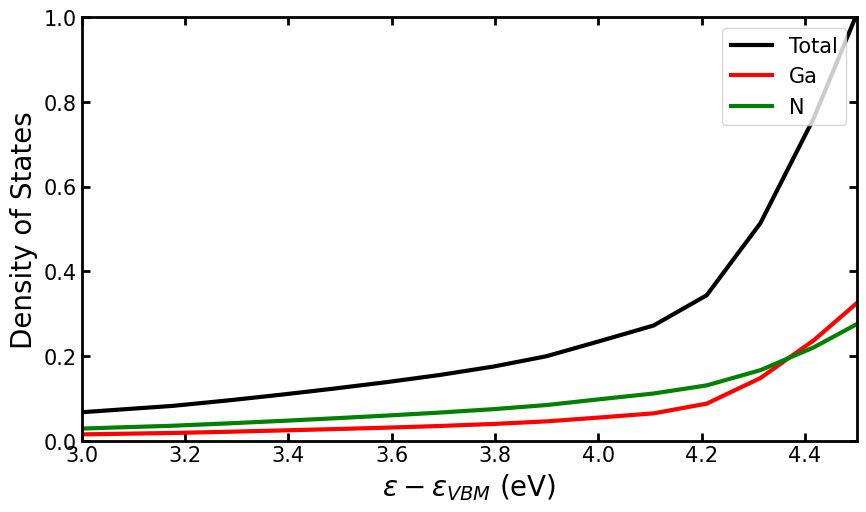

In [37]:
plt.figure(figsize=(10,5.5))

# Paper figure with smeared results
plt.plot(TDOS[:,0], TDOS[:,1], color='black', label='Total', linewidth=3)
plt.plot(PDOS_Ga[:,0], PDOS_Ga[:,1], color='red', label='Ga', linewidth=3)
plt.plot(PDOS_N[:,0], PDOS_N[:,1], color='green', label='N', linewidth=3)

# Labels
plt.xlabel('$\epsilon-\epsilon_{VBM}$ (eV)', fontsize=20)
plt.ylabel('Density of States', fontsize=20)

# Plot formatting
plt.legend(loc='upper right', fontsize=15)  # Move the legend to the top right and increase font size
plt.xticks(fontsize=15)  # Increase x-axis tick font size
plt.yticks(fontsize=15)  # Increase y-axis tick font size
plt.xlim(3,4.5)
plt.ylim(0,1)
ax = plt.gca()
ax.spines['top'].set_linewidth(2.0)   # Top border
ax.spines['right'].set_linewidth(2.0) # Right border
ax.spines['bottom'].set_linewidth(2.0)  # Bottom border (default width)
ax.spines['left'].set_linewidth(2.0)    # Left border (default width)
ax.tick_params(axis='both',  # Apply to both x and y axes
               which='both',  # Apply to both major and minor ticks
               direction='in',  # Tick direction (inward and outward)
               width=2,  # Thickness of the tick marks
               length=6, # Length of the tick marks
               bottom=True, top=True, left=True, right=True)  
plt.show()

## Band-decomposed charge density

Next, we look closer at a line profile of the band-decomposed charge densities. I believe we were looking for spikes at the Ga sites (green dashed lines) and N sites (grey dashed lines), with different bands showing shifts between the magnitude of the peaks. We did not see that, but this plot shows clearly that there is a different distribution of charge between the different states. The question remains whether or not that change would be enough to produce a significant $\Delta q_j$. We decided to move on with a prototype defect: a singly-hydrogenated Ga vacancy. 

In [20]:
file_path = f'../../PARCHG/PARCHG.1621_line.txt'
PARCHG1621 = np.loadtxt(file_path, skiprows=4)

file_path = f'../../PARCHG/PARCHG.1622_line.txt'
PARCHG1622 = np.loadtxt(file_path, skiprows=4)

file_path = f'../../PARCHG/PARCHG.1623_line.txt'
PARCHG1623 = np.loadtxt(file_path, skiprows=4)

file_path = f'../../PARCHG/PARCHG.1624_line.txt'
PARCHG1624 = np.loadtxt(file_path, skiprows=4)

file_path = f'../../PARCHG/PARCHG.1625_line.txt'
PARCHG1625 = np.loadtxt(file_path, skiprows=4)

file_path = f'../../PARCHG/PARCHG.1626_line.txt'
PARCHG1626 = np.loadtxt(file_path, skiprows=4)

file_path = f'../../PARCHG/PARCHG.1627_line.txt'
PARCHG1627 = np.loadtxt(file_path, skiprows=4)

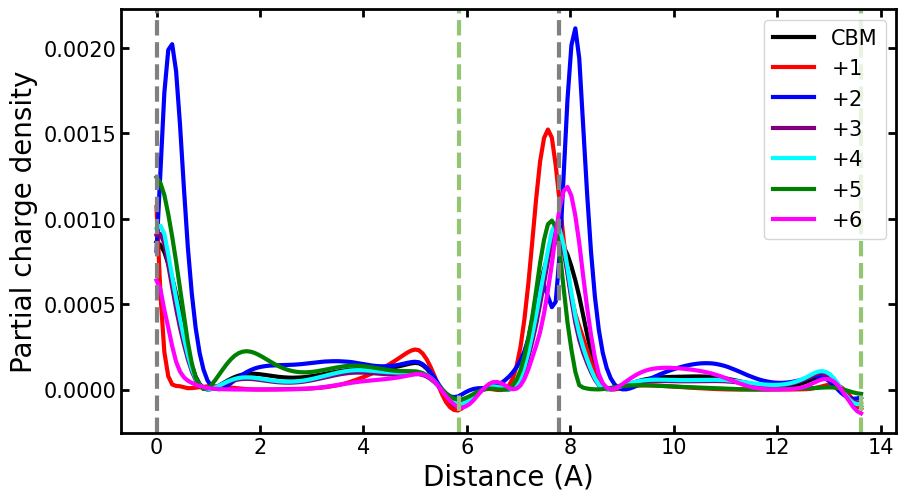

In [25]:
plt.figure(figsize=(10,5.5))

# Paper figure with smeared results
plt.plot(PARCHG1621[:,0], PARCHG1621[:,1], color='black', label='CBM', linewidth=3)
plt.plot(PARCHG1622[:,0], PARCHG1622[:,1], color='red', label='$+1$', linewidth=3)
plt.plot(PARCHG1623[:,0], PARCHG1623[:,1], color='blue', label='$+2$', linewidth=3)
plt.plot(PARCHG1624[:,0], PARCHG1624[:,1], color='purple', label='$+3$', linewidth=3)
plt.plot(PARCHG1625[:,0], PARCHG1625[:,1], color='cyan', label='$+4$', linewidth=3)
plt.plot(PARCHG1626[:,0], PARCHG1626[:,1], color='green', label='$+5$', linewidth=3)
plt.plot(PARCHG1627[:,0], PARCHG1627[:,1], color='magenta', label='$+6$', linewidth=3)

plt.axvline(x=0, color='grey', linestyle='--', linewidth=3)
plt.axvline(x=5.84, color=(147/255.0,198/255.0,115/255.0), linestyle='--', linewidth=3)
plt.axvline(x=7.78, color='grey', linestyle='--', linewidth=3)
plt.axvline(x=13.62, color=(147/255.0,198/255.0,115/255.0), linestyle='--', linewidth=3)

# Labels
plt.xlabel('Distance (A)', fontsize=20)
plt.ylabel('Partial charge density', fontsize=20)

# Plot formatting
plt.legend(loc='upper right', fontsize=15)  # Move the legend to the top right and increase font size
plt.xticks(fontsize=15)  # Increase x-axis tick font size
plt.yticks(fontsize=15)  # Increase y-axis tick font size
#plt.xlim(3,4.5)
#plt.ylim(0,1)
ax = plt.gca()
ax.spines['top'].set_linewidth(2.0)   # Top border
ax.spines['right'].set_linewidth(2.0) # Right border
ax.spines['bottom'].set_linewidth(2.0)  # Bottom border (default width)
ax.spines['left'].set_linewidth(2.0)    # Left border (default width)
ax.tick_params(axis='both',  # Apply to both x and y axes
               which='both',  # Apply to both major and minor ticks
               direction='in',  # Tick direction (inward and outward)
               width=2,  # Thickness of the tick marks
               length=6, # Length of the tick marks
               bottom=True, top=True, left=True, right=True)  
plt.show()

## Identify defect level by lining up bands

Need to use the PDOS on a Ga atom in the different systems to line up the bands so that we can determine what states are defect levels and what states are in the conduction band. I got the PDOS for deep in the valence band, then used the plot to visually line up the curves. The defect bands are shifted 0.045 eV relative to the pristine bands. This analysis along with a visual examination of the bands led to us identifying bands 1614 and 1615 as the defect levels in the gap for our supercell sizeof $5\times 3\times 3$.

In [8]:
file_path = f'GaN/pristine/PDOS_A1.dat'
PDOS_pristine = np.loadtxt(file_path, skiprows=1, usecols=(0, -1))

file_path = f'GaN_VGaH/PDOS_A1_UP.dat'
PDOS_defectUp = np.loadtxt(file_path, skiprows=1, usecols=(0, -1))

file_path = f'GaN_VGaH/PDOS_A1_DW.dat'
PDOS_defectDown = np.loadtxt(file_path, skiprows=1, usecols=(0, -1))

Plot the data as-is.

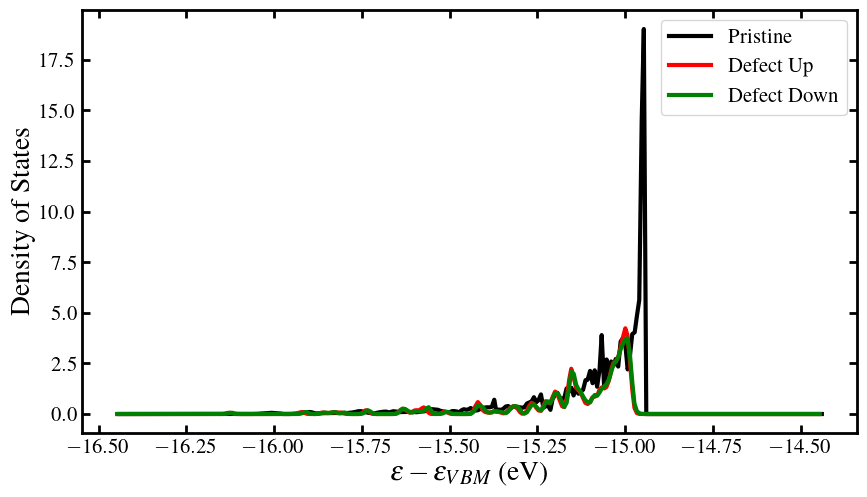

In [9]:
plt.figure(figsize=(10,5.5))

# Paper figure with smeared results
plt.plot(PDOS_pristine[:,0], PDOS_pristine[:,1], color='black', label='Pristine', linewidth=3)
plt.plot(PDOS_defectUp[:,0], PDOS_defectUp[:,1], color='red', label='Defect Up', linewidth=3)
plt.plot(PDOS_defectDown[:,0], -PDOS_defectDown[:,1], color='green', label='Defect Down', linewidth=3)

# Labels
plt.xlabel('$\epsilon-\epsilon_{VBM}$ (eV)', fontsize=20)
plt.ylabel('Density of States', fontsize=20)

# Plot formatting
plt.legend(loc='upper right', fontsize=15)  # Move the legend to the top right and increase font size
plt.xticks(fontsize=15)  # Increase x-axis tick font size
plt.yticks(fontsize=15)  # Increase y-axis tick font size
#plt.xlim(-16,-14)
#plt.ylim(0,2.5)
ax = plt.gca()
ax.spines['top'].set_linewidth(2.0)   # Top border
ax.spines['right'].set_linewidth(2.0) # Right border
ax.spines['bottom'].set_linewidth(2.0)  # Bottom border (default width)
ax.spines['left'].set_linewidth(2.0)    # Left border (default width)
ax.tick_params(axis='both',  # Apply to both x and y axes
               which='both',  # Apply to both major and minor ticks
               direction='in',  # Tick direction (inward and outward)
               width=2,  # Thickness of the tick marks
               length=6, # Length of the tick marks
               bottom=True, top=True, left=True, right=True)  
plt.show()

Verify that the curves match. There is a slight smearing in the defect curve, but the middle of the curves line up. 

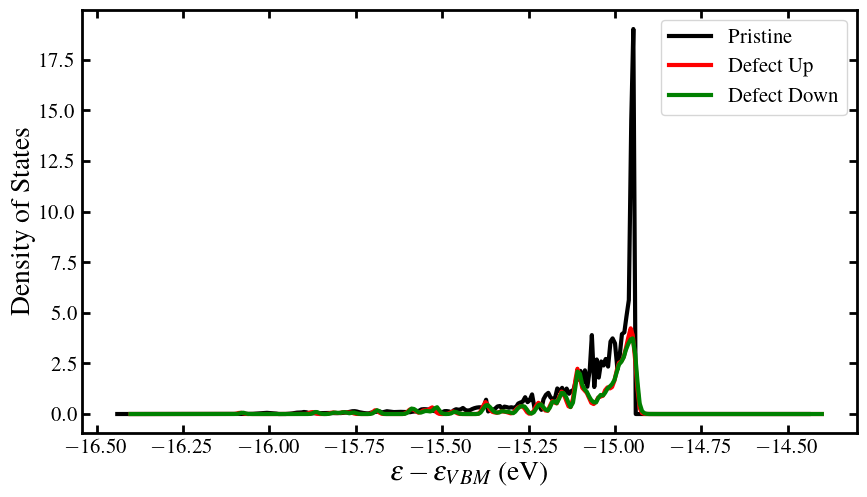

In [10]:
plt.figure(figsize=(10,5.5))
shift=0.045

# Paper figure with smeared results
plt.plot(PDOS_pristine[:,0], PDOS_pristine[:,1], color='black', label='Pristine', linewidth=3)
plt.plot(PDOS_defectUp[:,0]+shift, PDOS_defectUp[:,1], color='red', label='Defect Up', linewidth=3)
plt.plot(PDOS_defectDown[:,0]+shift, -PDOS_defectDown[:,1], color='green', label='Defect Down', linewidth=3)

# Labels
plt.xlabel('$\epsilon-\epsilon_{VBM}$ (eV)', fontsize=20)
plt.ylabel('Density of States', fontsize=20)

# Plot formatting
plt.legend(loc='upper right', fontsize=15)  # Move the legend to the top right and increase font size
plt.xticks(fontsize=15)  # Increase x-axis tick font size
plt.yticks(fontsize=15)  # Increase y-axis tick font size
#plt.xlim(-16,-14)
#plt.ylim(0,5)
ax = plt.gca()
ax.spines['top'].set_linewidth(2.0)   # Top border
ax.spines['right'].set_linewidth(2.0) # Right border
ax.spines['bottom'].set_linewidth(2.0)  # Bottom border (default width)
ax.spines['left'].set_linewidth(2.0)    # Left border (default width)
ax.tick_params(axis='both',  # Apply to both x and y axes
               which='both',  # Apply to both major and minor ticks
               direction='in',  # Tick direction (inward and outward)
               width=2,  # Thickness of the tick marks
               length=6, # Length of the tick marks
               bottom=True, top=True, left=True, right=True)  
plt.show()

## Max $S_j$ vs carrier energies

Wanted to look at the max $S_j$ values for each possible transition to verify that the values we were seeing were significant and identify transitions that may dominate. These numbers are now out of date because I believe we found a bug in the PhononPP code and/or changed the way we were calculating something. I can't remember now. But I wanted to leave this here because it may be a helpful analysis/visualization to use. Obviously it would be better to read in the max Sj from the `Sj.analysis.out` file, but I don't think I had implemented that yet. 

In [28]:
bandE = np.array([0, 0.032545, 0.123761, 0.259133, 0.424013, 0.607324, 0.607324, 0.801673, 1.002285])

# x is initial energy, y is final energy
Sj = np.zeros([9,9])
Sj[1,0] = 3.9745e-5
Sj[2,1] = 6.7744e-5
Sj[2,0] = 1.9348e-4
Sj[3,2] = 8.2799e-4
Sj[3,1] = 1.3170e-3
Sj[3,0] = 1.5032e-3
Sj[4,3] = 4.8514e-4
Sj[4,2] = 2.5807e-3
Sj[4,1] = 3.4009e-3
Sj[4,0] = 3.6963e-3
Sj[5,4] = 2.9018e-2
Sj[5,3] = 3.2353e-2
Sj[5,2] = 3.3584e-2
Sj[5,1] = 3.6319e-2
Sj[5,0] = 3.6684e-2
Sj[6,5] = 1.3412e-1
Sj[6,4] = 3.8370e-2
Sj[6,3] = 3.4729e-2
Sj[6,2] = 3.3477e-2
Sj[6,1] = 3.0854e-2
Sj[6,0] = 3.0519e-2
Sj[7,6] = 2.9515e-2
Sj[7,5] = 3.7802e-2
Sj[7,4] = 5.7996e-4
Sj[7,3] = 4.2604e-4
Sj[7,2] = 2.4419e-3
Sj[7,1] = 3.2412e-3
Sj[7,0] = 3.5298e-3
Sj[8,7] = 4.8586e-4
Sj[8,6] = 2.5691e-2
Sj[8,5] = 4.2413e-2
Sj[8,4] = 1.2673e-3
Sj[8,3] = 6.7989e-4
Sj[8,2] = 7.4929e-4
Sj[8,1] = 1.2173e-3
Sj[8,0] = 1.3965e-3

In [29]:
np.log10(Sj)[1,0]

/tmp/ipykernel_30703/3031637604.py:1: RuntimeWarning: divide by zero encountered in log10
  np.log10(Sj)[1,0]


-4.400717498680255

In [30]:
Sjplot = np.zeros_like(Sj)

for i in range(9):
    Sjplot[:,i] = np.flip(Sj[:,i])
    
for i in range(9):
    Sjplot[i,:] = np.flip(Sjplot[i,:])

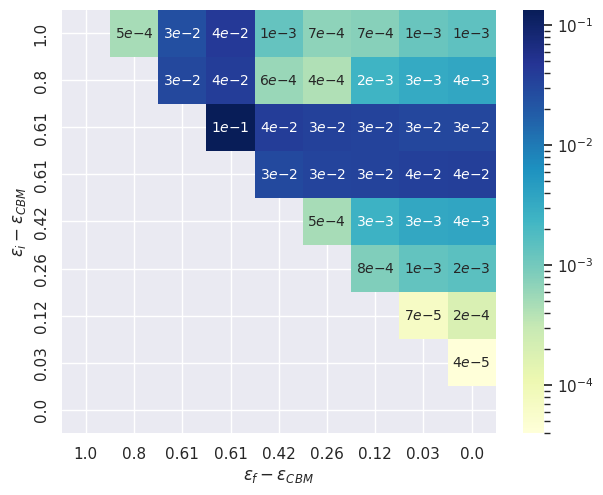

In [48]:
plt.figure(figsize=(7,5.5))
sb.set(font_scale=1.0)
#mask = np.triu(np.ones_like(Sjplot))
# Define custom style with light grey background and white grid lines
custom_style = {
    "axes.facecolor": "#EAEAF2",  # Background color
    "grid.color": "white",           # Grid line color
}

# Set the custom style
sb.set_style(style="whitegrid", rc=custom_style)

s = sb.heatmap(Sjplot, 
               cmap="YlGnBu", 
               xticklabels=np.flip(np.round(bandE,2)), 
               yticklabels=np.flip(np.round(bandE,2)), 
               annot=True,
               fmt='.0e',
               mask=Sjplot==0.0,
               norm=LogNorm())
s.set(xlabel='$\epsilon_f-\epsilon_{CBM}$', ylabel='$\epsilon_i-\epsilon_{CBM}$')

# Define a custom formatter function for annotations
def custom_formatter(x):
    """
    Custom formatter function to format numbers in scientific notation with one digit in the exponent.
    """
    parts = '{:.0e}'.format(x).split('e')
    return fr'${parts[0]}e{{{int(parts[1]):d}}}$'

# Apply the custom formatter to the annotations
for t in s.texts:
    t.set_text(custom_formatter(float(t.get_text())))
    t.set_fontsize(10)
    
plt.show()

## Checking for H bonding and antibonding states

They had me plot the spin channels for N and H to try to identify bonding and antibonding states. I'm honestly not sure how to find them from this plot, but I wanted to leave this here just in case. I actually found a helpful way to indentify highly localized states in the bands when I was trying to line up the bands in the perfect-crystal and defect systems. Using the TME code, you can calculate the overlaps of each of the pairs of bands. Most bands will have a pretty good match, but if a state is highly localized in the valence band and related to the defect, it will not have a match in the perfect crystal. That analysis helped me identify the dangling-bond state in the valence band and remove it from consideration.

In [11]:
file_path = f'old1/PDOS_A346_UP.dat'
PDOS_NUp = np.loadtxt(file_path, skiprows=1, usecols=(0, -1))

file_path = f'old1/PDOS_A346_DW.dat'
PDOS_NDown = np.loadtxt(file_path, skiprows=1, usecols=(0, -1))

file_path = f'old1/PDOS_A360_UP.dat'
PDOS_HUp = np.loadtxt(file_path, skiprows=1, usecols=(0, -1))

file_path = f'old1/PDOS_A360_DW.dat'
PDOS_HDown = np.loadtxt(file_path, skiprows=1, usecols=(0, -1))

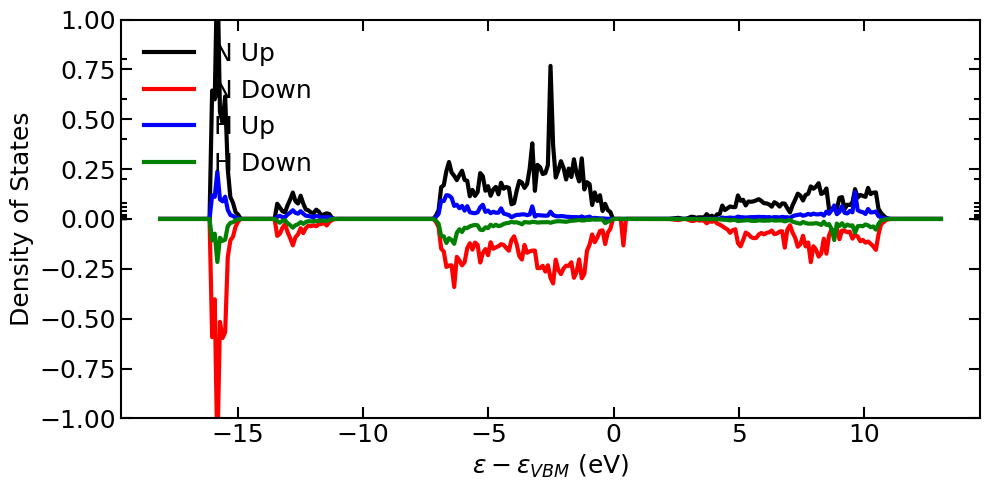

In [12]:
plt.figure(figsize=(10,5))

plt.plot(PDOS_NUp[:,0], PDOS_NUp[:,1], color='black', label='N Up', linewidth=3)
plt.plot(PDOS_NDown[:,0], PDOS_NDown[:,1], color='red', label='N Down', linewidth=3)
plt.plot(PDOS_HUp[:,0], PDOS_HUp[:,1], color='blue', label='H Up', linewidth=3)
plt.plot(PDOS_HDown[:,0], PDOS_HDown[:,1], color='green', label='H Down', linewidth=3)

# Labels
plt.xlabel('$\epsilon-\epsilon_{VBM}$ (eV)', fontsize=18)
plt.ylabel('Density of States', fontsize=18)

# Plot formatting
plt.legend(loc='upper left', fontsize=18, frameon=False)  # Move the legend to the top right and increase font size
plt.xticks(fontsize=18)  # Increase x-axis tick font size
plt.yticks(fontsize=18)  # Increase y-axis tick font size
plt.ylim(-1,1)
#plt.xlim(3.5,10)
ax = plt.gca()
ax.spines['top'].set_linewidth(1.5)   # Top border
ax.spines['right'].set_linewidth(1.5) # Right border
ax.spines['bottom'].set_linewidth(1.5)  # Bottom border (default width)
ax.spines['left'].set_linewidth(1.5)    # Left border (default width)
ax.tick_params(axis='both',  # Apply to both x and y axes
               which='minor',  # Apply to both major and minor ticks
               direction='in',  # Tick direction (inward and outward)
               width=1.5,  # Thickness of the tick marks
               length=4, # Length of the tick marks
               bottom=True, top=True, left=True, right=True)  
ax.tick_params(axis='both',  # Apply to both x and y axes
               which='major',  # Apply to both major and minor ticks
               direction='in',  # Tick direction (inward and outward)
               width=1.5,  # Thickness of the tick marks
               length=8, # Length of the tick marks
               bottom=True, top=True, left=True, right=True)  
locmin = ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(ticker.NullFormatter())
plt.tight_layout()
#plt.savefig('SiVH3_0th1st_posToNeut_20240229Laura.png',dpi=1200)
plt.show()

## PARCHG Line Profiles

At this point, we have looked at the band-decomposed charge densities, identified clear differences in their localziation, and verified that those changes result in significant $\Delta q_j$. Sok thought that it would be easier to see the differences in a line plot because 3D plots are sometimes hard to look at. I created this line plot to include in my slides, but it is difficult to see how significant the changes are because the peaks in the two bands chosen here are $p$-like with little overlap, so I included the 3D plot in my slides as well.

In [4]:
file_path = f'GaN_VGaH/PARCHGLineProfiles/lineProfile.1551.txt'
lp1551 = np.loadtxt(file_path, skiprows=4)

file_path = f'GaN_VGaH/PARCHGLineProfiles/lineProfile.1568.txt'
lp1568 = np.loadtxt(file_path, skiprows=4)

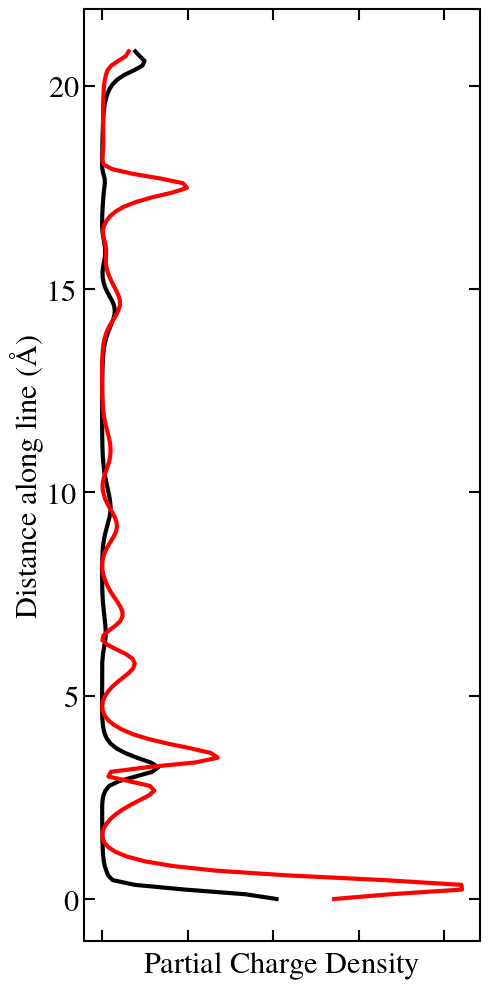

In [13]:
plt.figure(figsize=(5,10))

plt.plot(lp1551[:,1], lp1551[:,0], color='black', label='1551', linewidth=3)
plt.plot(lp1568[:,1], lp1568[:,0], color='red', label='1568', linewidth=3)

# Labels
plt.xlabel('Partial Charge Density', fontsize=22)
plt.ylabel('Distance along line (\u00C5)', fontsize=22)

# Plot formatting
#plt.legend(loc='best', fontsize=18, frameon=False)  # Move the legend to the top right and increase font size
plt.xticks(fontsize=22)  # Increase x-axis tick font size
plt.yticks(fontsize=22)  # Increase y-axis tick font size
#plt.ylim(-1,1)
#plt.xlim(3.5,10)
ax = plt.gca()
ax.spines['top'].set_linewidth(1.5)   # Top border
ax.spines['right'].set_linewidth(1.5) # Right border
ax.spines['bottom'].set_linewidth(1.5)  # Bottom border (default width)
ax.spines['left'].set_linewidth(1.5)    # Left border (default width)
ax.tick_params(axis='both',  # Apply to both x and y axes
               which='minor',  # Apply to both major and minor ticks
               direction='in',  # Tick direction (inward and outward)
               width=1.5,  # Thickness of the tick marks
               length=4, # Length of the tick marks
               bottom=True, top=True, left=True, right=True)  
ax.tick_params(axis='both',  # Apply to both x and y axes
               which='major',  # Apply to both major and minor ticks
               direction='in',  # Tick direction (inward and outward)
               width=1.5,  # Thickness of the tick marks
               length=8, # Length of the tick marks
               bottom=True, top=True, left=True, right=True)  
#locmin = ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
#ax.yaxis.set_minor_locator(locmin)
ax.xaxis.set_major_formatter(ticker.NullFormatter())
plt.tight_layout()
#plt.savefig('SiVH3_0th1st_posToNeut_20240229Laura.png',dpi=1200)
plt.show()

## Plot all carrier distributions

Max and Dallin sent over carrier distributions for different fields. These are "fake" distributions because they are based on a HEMT but applied to the valence band states that we use for our proof-of-concept calculation since the conduction band is so steep and would require multiple $k$-points and scattering between the supercell $k$-points. The first column in the files he send is the carrier energy relative to the valence band, the second column is the carrier probability normalized to 1 for each distribution, and the third column is the carrier probability density normalized to the carrier density (different for each curve). 

The curve with the densities normalized to 1 is useful to compare the extent of the curves, but the curves normalized to the carrier densities are what should be reported and what should be used in the calculations. The second curve below is in my dissertation/the paper.

In [4]:
file_path = 'h_en_dist_1e6.txt'
carrierDist_1e6 = np.loadtxt(file_path, skiprows=5)#, usecols=(0, -1))

file_path = 'h_en_dist_1e5.txt'
carrierDist_1e5 = np.loadtxt(file_path, skiprows=5)#, usecols=(0, -1))

file_path = 'h_en_dist_6e3.txt'
carrierDist_6e3 = np.loadtxt(file_path, skiprows=5)#, usecols=(0, -1))

Normalized to 1

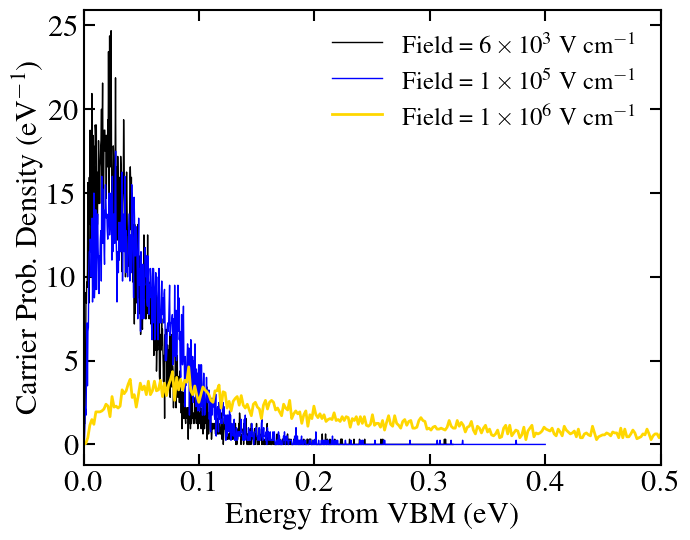

In [5]:
plt.figure(figsize=(7,5.5))

# Plot just the last mode occupation over time
plt.plot(carrierDist_6e3[:,0], carrierDist_6e3[:,1], color='black', label=r'Field = $6 \times 10^{3}$ V cm$^{-1}$', linewidth=1)
plt.plot(carrierDist_1e5[:,0], carrierDist_1e5[:,1], color='blue', label=r'Field = $1 \times 10^{5}$ V cm$^{-1}$', linewidth=1)
plt.plot(carrierDist_1e6[:,0], carrierDist_1e6[:,1], color='gold', label=r'Field = $1 \times 10^{6}$ V cm$^{-1}$', linewidth=2)

# Labels
plt.xlabel('Energy from VBM (eV)', fontsize=22)
plt.ylabel('Carrier Prob. Density (eV$^{-1}$)', fontsize=22)

# Plot formatting
plt.legend(loc='best', fontsize=18, frameon=False)  # Move the legend to the top right and increase font size
plt.xticks(fontsize=22)  # Increase x-axis tick font size
plt.yticks(fontsize=22)  # Increase y-axis tick font size
#plt.ylim(0,25)
plt.xlim(0.0,0.5)
ax = plt.gca()
ax.spines['top'].set_linewidth(1.5)   # Top border
ax.spines['right'].set_linewidth(1.5) # Right border
ax.spines['bottom'].set_linewidth(1.5)  # Bottom border (default width)
ax.spines['left'].set_linewidth(1.5)    # Left border (default width)
ax.tick_params(axis='both',  # Apply to both x and y axes
               which='minor',  # Apply to both major and minor ticks
               direction='in',  # Tick direction (inward and outward)
               width=1.5,  # Thickness of the tick marks
               length=4, # Length of the tick marks
               bottom=True, top=True, left=True, right=True)  
ax.tick_params(axis='both',  # Apply to both x and y axes
               which='major',  # Apply to both major and minor ticks
               direction='in',  # Tick direction (inward and outward)
               width=1.5,  # Thickness of the tick marks
               length=8, # Length of the tick marks
               bottom=True, top=True, left=True, right=True)  
#locmin = ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
#ax.yaxis.set_minor_locator(locmin)
#ax.xaxis.set_major_formatter(ticker.NullFormatter())
plt.tight_layout()
#plt.savefig('CarrierProbabilityDensityComparison.png',dpi=1200)
plt.show()

Normalized to carrier density

/tmp/ipykernel_309/3861402261.py:54: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


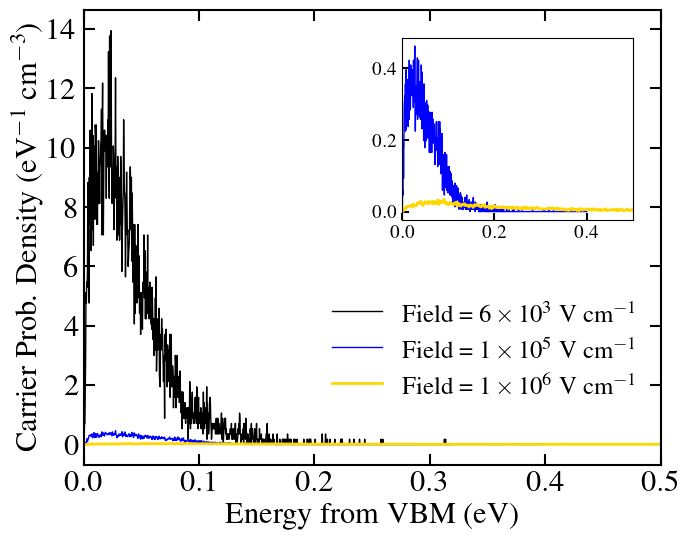

In [6]:
plt.figure(figsize=(7,5.5))

# Plot just the last mode occupation over time
plt.plot(carrierDist_6e3[:,0], carrierDist_6e3[:,2]*4.067e-21, color='black', label=r'Field = $6 \times 10^{3}$ V cm$^{-1}$', linewidth=1)
plt.plot(carrierDist_1e5[:,0], carrierDist_1e5[:,2]*4.067e-21, color='blue', label=r'Field = $1 \times 10^{5}$ V cm$^{-1}$', linewidth=1)
plt.plot(carrierDist_1e6[:,0], carrierDist_1e6[:,2]*4.067e-21, color='gold', label=r'Field = $1 \times 10^{6}$ V cm$^{-1}$', linewidth=2)

# Labels
plt.xlabel('Energy from VBM (eV)', fontsize=22)
plt.ylabel('Carrier Prob. Density (eV$^{-1}$ cm$^{-3}$)', fontsize=22)

# Plot formatting
plt.legend(loc='lower right', fontsize=18, frameon=False, bbox_to_anchor=(1, 0.1))  # Move the legend to the top right and increase font size
plt.xticks(fontsize=22)  # Increase x-axis tick font size
plt.yticks(fontsize=22)  # Increase y-axis tick font size
#plt.ylim(0,25)
plt.xlim(0.0,0.5)
ax = plt.gca()
ax.spines['top'].set_linewidth(1.5)   # Top border
ax.spines['right'].set_linewidth(1.5) # Right border
ax.spines['bottom'].set_linewidth(1.5)  # Bottom border (default width)
ax.spines['left'].set_linewidth(1.5)    # Left border (default width)
ax.tick_params(axis='both',  # Apply to both x and y axes
               which='minor',  # Apply to both major and minor ticks
               direction='in',  # Tick direction (inward and outward)
               width=1.5,  # Thickness of the tick marks
               length=4, # Length of the tick marks
               bottom=True, top=True, left=True, right=True)  
ax.tick_params(axis='both',  # Apply to both x and y axes
               which='major',  # Apply to both major and minor ticks
               direction='in',  # Tick direction (inward and outward)
               width=1.5,  # Thickness of the tick marks
               length=8, # Length of the tick marks
               bottom=True, top=True, left=True, right=True)  
#locmin = ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
#ax.yaxis.set_minor_locator(locmin)
#ax.xaxis.set_major_formatter(ticker.NullFormatter())

# Inset plot in the upper right corner
inset_ax = inset_axes(ax, width="40%", height="40%", loc='upper right', borderpad=2.0)

# Plot only the smaller curves in the inset
inset_ax.plot(carrierDist_1e5[:, 0], carrierDist_1e5[:, 2]*4.067e-21, color='blue', label=r'Field = $1 \times 10^{5}$ V cm$^{-1}$', linewidth=1)
inset_ax.plot(carrierDist_1e6[:, 0], carrierDist_1e6[:, 2]*4.067e-21, color='gold', label=r'Field = $1 \times 10^{6}$ V cm$^{-1}$', linewidth=2)

# Zoom in for the inset
inset_ax.set_xlim(0.0, 0.5)
#inset_ax.set_ylim(0, 0.5)
inset_ax.tick_params(axis='both', which='major', direction='in', length=5, width=1.5, labelsize=14)  # Set the font size for the inset tick labels

inset_ax.tick_params(axis='both', which='major', direction='in', length=5, width=1.5)
#inset_ax.legend(fontsize=14, frameon=False)

plt.tight_layout()
plt.savefig('CarrierProbabilityDensityComparison.png',dpi=1200)
plt.show()

## Validate energy average window

In order to use the density in the code, we have to choose the values of the density corresponding to the discrete band states in our calculations. To do this, I average the density over a small window to reduce the effect of noise, but we need to validate that our energy average window is adequate. I used an energy average window of 0.01 eV, and the plot below shows that the curve is sampled adequately. *Note that in the plot below and in the code, the sign of the energy from the valence band is flipped to negative to match the energies from my VASP calculations.*

In [4]:
file_path = 'h_en_dist_1e6.txt'
carrierDist_1e6 = np.loadtxt(file_path, skiprows=5, usecols=(0, -1))

In [11]:
carrierDist_1e6_avgWin = np.array([
 [-1.168E+000,  2.837E-004],
 [-1.168E+000,  2.837E-004],
 [-1.168E+000,  2.837E-004],
 [-1.053E+000,  7.802E-004],
 [-1.052E+000,  7.802E-004],
 [-9.956E-001,  1.192E-003],
 [-9.682E-001,  1.560E-003],
 [-9.332E-001,  1.348E-003],
 [-9.257E-001,  1.532E-003],
 [-9.257E-001,  1.532E-003],
 [-8.000E-001,  2.298E-003],
 [-7.990E-001,  2.270E-003],
 [-7.990E-001,  2.270E-003],
 [-7.580E-001,  1.872E-003],
 [-7.278E-001,  1.787E-003],
 [-7.278E-001,  1.787E-003],
 [-6.461E-001,  2.766E-003],
 [-6.461E-001,  2.766E-003],
 [-6.461E-001,  2.766E-003],
 [-6.027E-001,  2.624E-003],
 [-5.750E-001,  2.908E-003],
 [-5.750E-001,  2.908E-003],
 [-5.750E-001,  2.908E-003],
 [-5.750E-001,  2.908E-003],
 [-3.591E-001,  4.752E-003],
 [-3.591E-001,  4.752E-003],
 [-2.736E-001,  9.858E-003],
 [-2.736E-001,  9.858E-003],
 [-2.727E-001,  9.362E-003],
 [-2.448E-001,  9.447E-003],
 [-3.070E-002,  1.894E-002],
 [-9.000E-004,  2.979E-003],
 [0.000E+000,  1.135E-003]
])

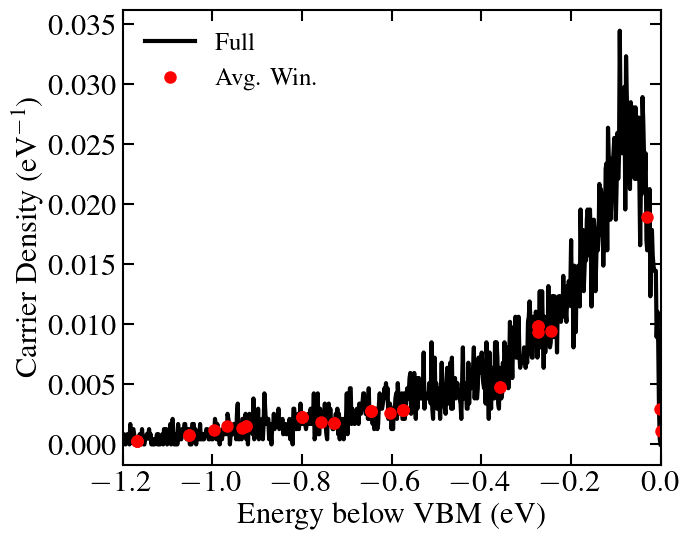

In [24]:
plt.figure(figsize=(7,5.5))

# Plot just the last mode occupation over time
plt.plot(-carrierDist_1e6[:,0], carrierDist_1e6[:,1]*4.067e-21, color='black', label=r'Full', linewidth=3)
plt.plot(carrierDist_1e6_avgWin[:,0], carrierDist_1e6_avgWin[:,1], color='red', label=r'Avg. Win.', linewidth=3, marker='.', linestyle='None',markersize=16)
#plt.plot(t_1eNeg7*1e6, nj_1eNeg7_6e3[:,550,1], color='black', label=r'$6\times 10^{3}$', linewidth=3)

# Labels
plt.xlabel('Energy below VBM (eV)', fontsize=22)
plt.ylabel('Carrier Density (eV$^{-1}$)', fontsize=22)

# Plot formatting
plt.legend(loc='best', fontsize=18, frameon=False)  # Move the legend to the top right and increase font size
plt.xticks(fontsize=22)  # Increase x-axis tick font size
plt.yticks(fontsize=22)  # Increase y-axis tick font size
#plt.ylim(-1,1)
plt.xlim(-1.2,0.0)
ax = plt.gca()
ax.spines['top'].set_linewidth(1.5)   # Top border
ax.spines['right'].set_linewidth(1.5) # Right border
ax.spines['bottom'].set_linewidth(1.5)  # Bottom border (default width)
ax.spines['left'].set_linewidth(1.5)    # Left border (default width)
ax.tick_params(axis='both',  # Apply to both x and y axes
               which='minor',  # Apply to both major and minor ticks
               direction='in',  # Tick direction (inward and outward)
               width=1.5,  # Thickness of the tick marks
               length=4, # Length of the tick marks
               bottom=True, top=True, left=True, right=True)  
ax.tick_params(axis='both',  # Apply to both x and y axes
               which='major',  # Apply to both major and minor ticks
               direction='in',  # Tick direction (inward and outward)
               width=1.5,  # Thickness of the tick marks
               length=8, # Length of the tick marks
               bottom=True, top=True, left=True, right=True)  
#locmin = ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
#ax.yaxis.set_minor_locator(locmin)
#ax.xaxis.set_major_formatter(ticker.NullFormatter())
plt.tight_layout()
#plt.savefig('SiVH3_0th1st_posToNeut_20240229Laura.png',dpi=1200)
plt.show()

# Histogram of converged states

I was only able to converge the relaxation of some of the band states, so I wanted to look at the histogram of the states I was able to converge over energy. This plot shows that, either due to difficulties in converging or the discrete sampling of states at $\Gamma$, more states are sampled at higher energies and there are very few at low energies. The two lower-field carrier densities go to zero before 0.2 eV, but this plot shows that there are only 3 states sampled there. Indeed, we find that, allowing transitions up and down in energy, the energy transfer rate seems to be negative for the lower-field curves, due to the lack of adequate sampling of states in that lower-energy range. 

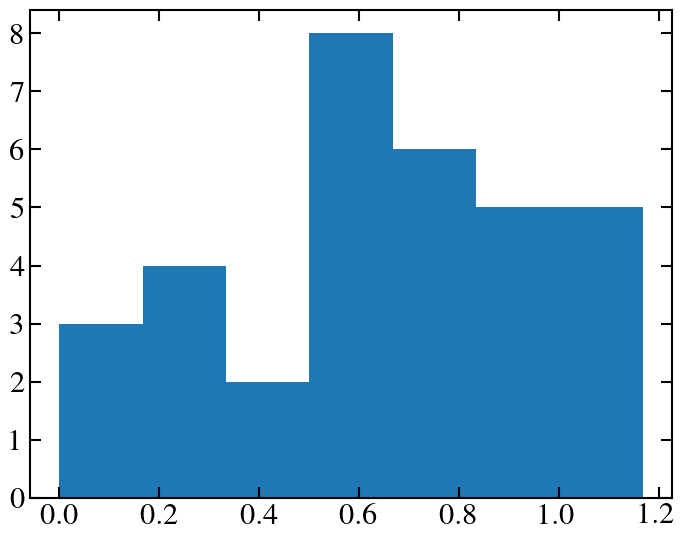

In [30]:
plt.figure(figsize=(7,5.5))

# Plot just the last mode occupation over time
plt.hist(-carrierDist_1e6_avgWin[:,0],7)

# Labels
#plt.xlabel('Energy below VBM (eV)', fontsize=22)
#plt.ylabel('Carrier Density (eV$^{-1}$)', fontsize=22)

# Plot formatting
#plt.legend(loc='best', fontsize=18, frameon=False)  # Move the legend to the top right and increase font size
plt.xticks(fontsize=22)  # Increase x-axis tick font size
plt.yticks(fontsize=22)  # Increase y-axis tick font size
#plt.ylim(-1,1)
#plt.xlim(-1.2,0.0)
ax = plt.gca()
ax.spines['top'].set_linewidth(1.5)   # Top border
ax.spines['right'].set_linewidth(1.5) # Right border
ax.spines['bottom'].set_linewidth(1.5)  # Bottom border (default width)
ax.spines['left'].set_linewidth(1.5)    # Left border (default width)
ax.tick_params(axis='both',  # Apply to both x and y axes
               which='minor',  # Apply to both major and minor ticks
               direction='in',  # Tick direction (inward and outward)
               width=1.5,  # Thickness of the tick marks
               length=4, # Length of the tick marks
               bottom=True, top=True, left=True, right=True)  
ax.tick_params(axis='both',  # Apply to both x and y axes
               which='major',  # Apply to both major and minor ticks
               direction='in',  # Tick direction (inward and outward)
               width=1.5,  # Thickness of the tick marks
               length=8, # Length of the tick marks
               bottom=True, top=True, left=True, right=True)  
#locmin = ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
#ax.yaxis.set_minor_locator(locmin)
#ax.xaxis.set_major_formatter(ticker.NullFormatter())
plt.tight_layout()
#plt.savefig('SiVH3_0th1st_posToNeut_20240229Laura.png',dpi=1200)
plt.show()

## Harmonic energy transfer into modes

The original point of this section was to test the convergence of the time step by plotting the stretch mode occupation over time for the different step sizes. I thought I found a converged time step, but plugging the numbers into the rogue-waves code resulted in crazy curves. I investigated further and found that only 0.01\% of the energy was going into the stretch mode, while one of the other modes (550) was taking up around 20\%. It is clear that the displacement from the changes in the charge density  between the different bands projects much better in general onto mode 550, which involves movement of all of the atoms, than the stretch mode, which is primarily motion of the N-H bonded atoms. 

As a result of this analysis, we decided to move from a harmonic energy transfer into the modes, weighted by $\omega_j S_j$, to a thermalized energy transfer that gets distributed across all modes. I also implemented an adaptive time step so that it would automatically be reduced so as to not produce too large of a change between steps. 

In [8]:
t_1eNeg7 = np.linspace(0,1,25)*1e-7*25
#t_1eNeg7

In [9]:
OCC_PATH = './GaN_VGaH/occupationsOverTime/1eNeg7_1e6/'

nj_1eNeg7_1e6 = []


for iRt in range(25):    
    file_path = f'{OCC_PATH}/nj.{iRt+1}.out'
    nj_iRt = np.loadtxt(file_path, skiprows=2)
    nj_1eNeg7_1e6.append(nj_iRt)

        
nj_1eNeg7_1e6 = np.array(nj_1eNeg7_1e6)
#nj_1eNeg7_1e6[0,-1,1]

In [10]:
OCC_PATH = './GaN_VGaH/occupationsOverTime/1eNeg7_1e5/'

nj_1eNeg7_1e5 = []

# Read energies for each k-point
for iRt in range(25):    
    file_path = f'{OCC_PATH}/nj.{iRt+1}.out'
    nj_iRt = np.loadtxt(file_path, skiprows=2)
    nj_1eNeg7_1e5.append(nj_iRt)

        
nj_1eNeg7_1e5 = np.array(nj_1eNeg7_1e5)
#nj_1eNeg7_1e5[0,-1,1]

In [11]:
OCC_PATH = './GaN_VGaH/occupationsOverTime/1eNeg7_6e3/'

nj_1eNeg7_6e3 = []

# Read energies for each k-point
for iRt in range(25):    
    file_path = f'{OCC_PATH}/nj.{iRt+1}.out'
    nj_iRt = np.loadtxt(file_path, skiprows=2)
    nj_1eNeg7_6e3.append(nj_iRt)

        
nj_1eNeg7_6e3 = np.array(nj_1eNeg7_6e3)
#nj_1eNeg7_6e3[0,-1,1]

In [5]:
OCC_PATH = './GaN_VGaH/occupationsOverTime/1eNeg5_1e6/'

nj_1eNeg5_1e6 = []

# Read energies for each k-point
for iRt in range(25):    
    file_path = f'{OCC_PATH}/nj.{iRt+1}.out'
    nj_iRt = np.loadtxt(file_path, skiprows=2)
    nj_1eNeg5_1e6.append(nj_iRt)

        
nj_1eNeg5_1e6 = np.array(nj_1eNeg5_1e6)
#nj_1eNeg5_1e6[0,-1,1]

t_1eNeg5 = np.linspace(0,1,25)*1e-5*25
#t_1eNeg4

In [50]:
t_1eNeg3 = np.linspace(0,1,25)*1e-3*25
#t_1eNeg3

In [53]:
OCC_PATH = './GaN_VGaH/occupationsOverTime/1eNeg3_1e6/'

nj_1eNeg3_1e6 = []

# Read energies for each k-point
for iRt in range(25):    
    file_path = f'{OCC_PATH}/nj.{iRt+1}.out'
    nj_iRt = np.loadtxt(file_path, skiprows=2)
    nj_1eNeg3_1e6.append(nj_iRt)

        
nj_1eNeg3_1e6 = np.array(nj_1eNeg3_1e6)
#nj_1eNeg3_1e6[0,-1,1]

In [54]:
OCC_PATH = './GaN_VGaH/occupationsOverTime/1eNeg3_1e5/'

nj_1eNeg3_1e5 = []

# Read energies for each k-point
for iRt in range(25):    
    file_path = f'{OCC_PATH}/nj.{iRt+1}.out'
    nj_iRt = np.loadtxt(file_path, skiprows=2)
    nj_1eNeg3_1e5.append(nj_iRt)

        
nj_1eNeg3_1e5 = np.array(nj_1eNeg3_1e5)
#nj_1eNeg3_1e5[0,-1,1]

In [55]:
OCC_PATH = './GaN_VGaH/occupationsOverTime/1eNeg3_6e3/'

nj_1eNeg3_6e3 = []

# Read energies for each k-point
for iRt in range(25):    
    file_path = f'{OCC_PATH}/nj.{iRt+1}.out'
    nj_iRt = np.loadtxt(file_path, skiprows=2)
    nj_1eNeg3_6e3.append(nj_iRt)

        
nj_1eNeg3_6e3 = np.array(nj_1eNeg3_6e3)
#nj_1eNeg3_6e3[0,-1,1]

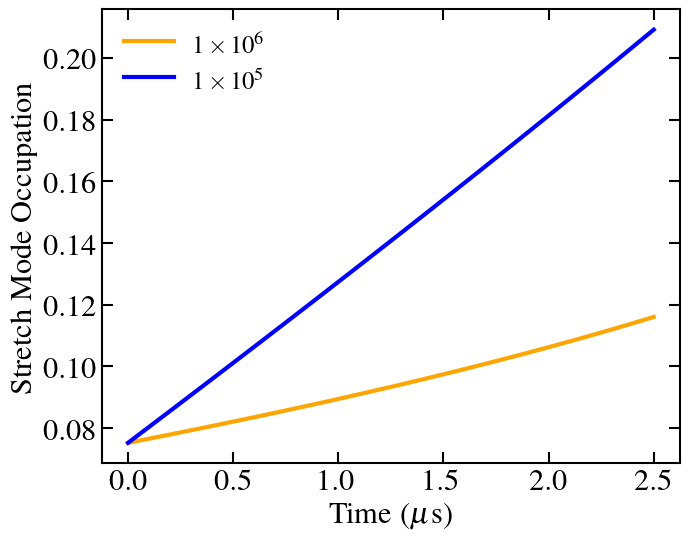

In [10]:
plt.figure(figsize=(7,5.5))

# Plot just the last mode occupation over time
plt.plot(t_1eNeg7*1e6, nj_1eNeg7_1e6[:,550,1], color='orange', label=r'$1\times 10^{6}$', linewidth=3)
plt.plot(t_1eNeg7*1e6, nj_1eNeg7_1e5[:,550,1], color='blue', label=r'$1\times 10^{5}$', linewidth=3)
#plt.plot(t_1eNeg7*1e6, nj_1eNeg7_6e3[:,550,1], color='black', label=r'$6\times 10^{3}$', linewidth=3)

# Labels
plt.xlabel('Time ($\mu$s)', fontsize=22)
plt.ylabel('Stretch Mode Occupation', fontsize=22)

# Plot formatting
plt.legend(loc='best', fontsize=18, frameon=False)  # Move the legend to the top right and increase font size
plt.xticks(fontsize=22)  # Increase x-axis tick font size
plt.yticks(fontsize=22)  # Increase y-axis tick font size
#plt.ylim(-1,1)
#plt.xlim(3.5,10)
ax = plt.gca()
ax.spines['top'].set_linewidth(1.5)   # Top border
ax.spines['right'].set_linewidth(1.5) # Right border
ax.spines['bottom'].set_linewidth(1.5)  # Bottom border (default width)
ax.spines['left'].set_linewidth(1.5)    # Left border (default width)
ax.tick_params(axis='both',  # Apply to both x and y axes
               which='minor',  # Apply to both major and minor ticks
               direction='in',  # Tick direction (inward and outward)
               width=1.5,  # Thickness of the tick marks
               length=4, # Length of the tick marks
               bottom=True, top=True, left=True, right=True)  
ax.tick_params(axis='both',  # Apply to both x and y axes
               which='major',  # Apply to both major and minor ticks
               direction='in',  # Tick direction (inward and outward)
               width=1.5,  # Thickness of the tick marks
               length=8, # Length of the tick marks
               bottom=True, top=True, left=True, right=True)  
#locmin = ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
#ax.yaxis.set_minor_locator(locmin)
#ax.xaxis.set_major_formatter(ticker.NullFormatter())
plt.tight_layout()
#plt.savefig('SiVH3_0th1st_posToNeut_20240229Laura.png',dpi=1200)
plt.show()

In [17]:
hbar_in_amu_ang_thz = 6.350779934891
mH = 1.007940
omegaStretch = 98.5038275790*2*np.pi

In [11]:
def getAmp(nj,omega):
    return np.sqrt(2*hbar_in_amu_ang_thz*(nj+0.5)/(mH*omega))

In [ ]:
getAmp()

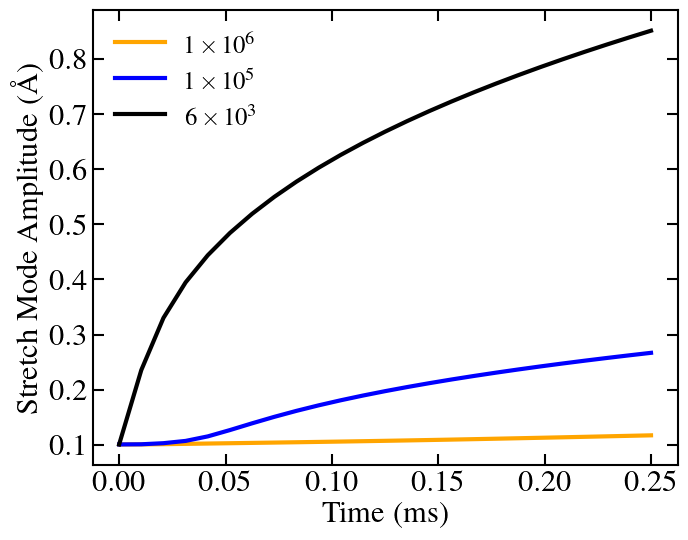

In [12]:
plt.figure(figsize=(7,5.5))

# Plot just the last mode occupation over time
plt.plot(t_1eNeg5*1e3, getAmp(nj_1eNeg5_1e6[:,-1,1],omegaStretch), color='orange', label=r'$1\times 10^{6}$', linewidth=3)
plt.plot(t_1eNeg5*1e3, getAmp(nj_1eNeg5_1e5[:,-1,1],omegaStretch), color='blue', label=r'$1\times 10^{5}$', linewidth=3)
plt.plot(t_1eNeg5*1e3, getAmp(nj_1eNeg5_6e3[:,-1,1],omegaStretch), color='black', label=r'$6\times 10^{3}$', linewidth=3)

# Labels
plt.xlabel('Time (ms)', fontsize=22)
plt.ylabel('Stretch Mode Amplitude (\u00C5)', fontsize=22)

# Plot formatting
plt.legend(loc='best', fontsize=18, frameon=False)  # Move the legend to the top right and increase font size
plt.xticks(fontsize=22)  # Increase x-axis tick font size
plt.yticks(fontsize=22)  # Increase y-axis tick font size
#plt.ylim(-1,1)
#plt.xlim(3.5,10)
ax = plt.gca()
ax.spines['top'].set_linewidth(1.5)   # Top border
ax.spines['right'].set_linewidth(1.5) # Right border
ax.spines['bottom'].set_linewidth(1.5)  # Bottom border (default width)
ax.spines['left'].set_linewidth(1.5)    # Left border (default width)
ax.tick_params(axis='both',  # Apply to both x and y axes
               which='minor',  # Apply to both major and minor ticks
               direction='in',  # Tick direction (inward and outward)
               width=1.5,  # Thickness of the tick marks
               length=4, # Length of the tick marks
               bottom=True, top=True, left=True, right=True)  
ax.tick_params(axis='both',  # Apply to both x and y axes
               which='major',  # Apply to both major and minor ticks
               direction='in',  # Tick direction (inward and outward)
               width=1.5,  # Thickness of the tick marks
               length=8, # Length of the tick marks
               bottom=True, top=True, left=True, right=True)  
#locmin = ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
#ax.yaxis.set_minor_locator(locmin)
#ax.xaxis.set_major_formatter(ticker.NullFormatter())
plt.tight_layout()
#plt.savefig('SiVH3_0th1st_posToNeut_20240229Laura.png',dpi=1200)
plt.show()

In [18]:
hbar_SI = 1.05457e-34
THzToHz = 1e12
JToEv = 6.242e18
hbaromega550 = 16.5586955771*2*np.pi*THzToHz*hbar_SI*JToEv
hbaromega1078 = 29.4756206279*2*np.pi*THzToHz*hbar_SI*JToEv
hbaromega1080 = omegaStretch*2*np.pi*THzToHz*hbar_SI*JToEv

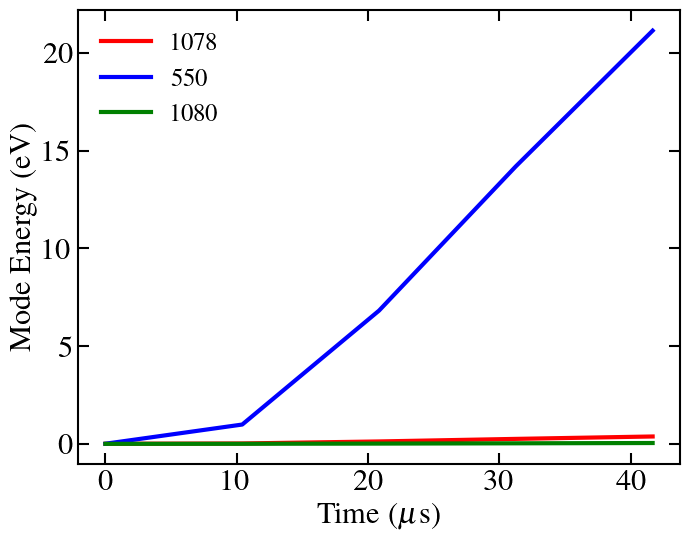

In [20]:
plt.figure(figsize=(7,5.5))

# Plot just the last mode occupation over time
plt.plot(t_1eNeg5[:5]*1e6, hbaromega1078*nj_1eNeg5_1e6[:5,-3,1], color='red', label='1078', linewidth=3)
plt.plot(t_1eNeg5[:5]*1e6, hbaromega550*nj_1eNeg5_1e6[:5,546,1], color='blue', label='550', linewidth=3)
plt.plot(t_1eNeg5[:5]*1e6, hbaromega1080*nj_1eNeg5_1e6[:5,1076,1], color='green', label='1080', linewidth=3)
#plt.plot(t_1eNeg5*1e3, nj_1eNeg5_1e6[:,-1,1], color='black', label='1080', linewidth=3)

# Labels
plt.xlabel('Time ($\mu$s)', fontsize=22)
plt.ylabel('Mode Energy (eV)', fontsize=22)

# Plot formatting
plt.legend(loc='best', fontsize=18, frameon=False)  # Move the legend to the top right and increase font size
plt.xticks(fontsize=22)  # Increase x-axis tick font size
plt.yticks(fontsize=22)  # Increase y-axis tick font size
#plt.ylim(-1,1)
#plt.xlim(3.5,10)
ax = plt.gca()
ax.spines['top'].set_linewidth(1.5)   # Top border
ax.spines['right'].set_linewidth(1.5) # Right border
ax.spines['bottom'].set_linewidth(1.5)  # Bottom border (default width)
ax.spines['left'].set_linewidth(1.5)    # Left border (default width)
ax.tick_params(axis='both',  # Apply to both x and y axes
               which='minor',  # Apply to both major and minor ticks
               direction='in',  # Tick direction (inward and outward)
               width=1.5,  # Thickness of the tick marks
               length=4, # Length of the tick marks
               bottom=True, top=True, left=True, right=True)  
ax.tick_params(axis='both',  # Apply to both x and y axes
               which='major',  # Apply to both major and minor ticks
               direction='in',  # Tick direction (inward and outward)
               width=1.5,  # Thickness of the tick marks
               length=8, # Length of the tick marks
               bottom=True, top=True, left=True, right=True)  
#locmin = ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
#ax.yaxis.set_minor_locator(locmin)
#ax.xaxis.set_major_formatter(ticker.NullFormatter())
plt.tight_layout()
#plt.savefig('SiVH3_0th1st_posToNeut_20240229Laura.png',dpi=1200)
plt.show()

## Thermalized energy transfer

At this point, I was using an adaptive time step, so the time cannot be generated--it must be read from a file. The code takes a starting temperature and outputs the occupations over time for each mode and the local temperature over time. I never actually used the occupations files, but I left them here just in case. Most of what I looked at was the temperature over "time." Because of the discrete sampling error detailed above, the lower-field distributions result in a negative energy transfer or cooling. The distribution with a hotter tail leads to heating over time. 

Originally, we thought we would look at the temperature change over time, but I don't think that is consistent with the philosophy of the rest of our formalism. In the rest of our formalism, we are not looking at specific events or dynamic processes; we are looking at average rates. I don't think it even makes sense to suggest that we could capture dynamics in this approach directly. 

Instead, we approached it as saying that for a given temperature (assumed to be constant in the device) there will be a saturation of the defects towards release (i.e., probability of release $= 1$). The rate constant $r$ in the equation $$\frac{d P}{dt} = r (1-P)$$ describes how quickly the probability $P$ is approaching saturation. We get a probability for any given set of occupation numbers from the rogue-waves code. We interpret the change in temperature$\rightarrow$occupations$\rightarrow$probability from each possible starting temperature as giving us $r$. 

### "Temperature change over time"
In the section below, I plot the "temperature over time," but that plot is not meaningful other than to say that as temperature goes up, there is a higher scattering cross section (as expected) and a higher temperature will result in a larger release rate.

In [5]:
PATH = './GaN_VGaH/occupationsOverTime/1e6'

nj_1e6 = []

# Read energies for each k-point
for iRt in range(25):    
    file_path = f'{PATH}/nj.{iRt+1}.out'
    nj_iRt = np.loadtxt(file_path, skiprows=2)
    nj_1e6.append(nj_iRt)

        
nj_1e6 = np.array(nj_1e6)

file_path = f'{PATH}/localTemp.out'
tempFileData = np.loadtxt(file_path, skiprows=1,usecols=(1,2))
temp_1e6 = tempFileData[:,1]
time_1e6 = tempFileData[:,0]
exceedance = np.array([2.6757359621940774e-12,6.262891757271119e-12,1.62242996719717e-11, 2.768053205512597e-11,4.901753729139273e-11,9.099849872054405e-11,1.7904075587259835e-10,3.7622553463739314e-10, 8.580835266553806e-10,1.3540208885887015e-09,2.1959719959416857e-09, 3.684463740905334e-09,6.42930359766281e-09,1.1743602222101439e-08,1.6235029282679394e-08,2.2760807176857352e-08,3.244079014552409e-08,4.7090224785520077e-08,6.97563491401201e-08,1.0570227605345132e-07,1.643096922040447e-07,2.629068226212174e-07,3.3720216681063165e-07,4.3615867135071797e-07,5.69678859609092e-07])

In [6]:
PATH = './GaN_VGaH/occupationsOverTime/1e5'

nj_1e5 = []

# Read energies for each k-point
for iRt in range(25):    
    file_path = f'{PATH}/nj.{iRt+1}.out'
    nj_iRt = np.loadtxt(file_path, skiprows=2)
    nj_1e5.append(nj_iRt)

        
nj_1e5 = np.array(nj_1e5)

file_path = f'{PATH}/localTemp.out'
tempFileData = np.loadtxt(file_path, skiprows=1,usecols=(1,2))
temp_1e5 = tempFileData[:,1]
time_1e5 = tempFileData[:,0]

In [7]:
PATH = './GaN_VGaH/occupationsOverTime/6e3'

nj_6e3 = []

# Read energies for each k-point
for iRt in range(25):    
    file_path = f'{PATH}/nj.{iRt+1}.out'
    nj_iRt = np.loadtxt(file_path, skiprows=2)
    nj_6e3.append(nj_iRt)

        
nj_6e3 = np.array(nj_6e3)

file_path = f'{PATH}/localTemp.out'
tempFileData = np.loadtxt(file_path, skiprows=1,usecols=(1,2))
temp_6e3 = tempFileData[:,1]
time_6e3 = tempFileData[:,0]

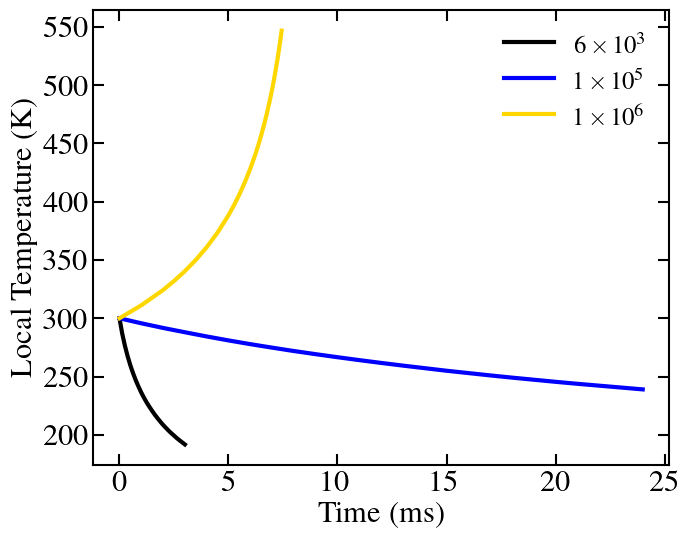

In [8]:
plt.figure(figsize=(7,5.5))

# Plot just the last mode occupation over time
plt.plot(time_6e3*1e3, temp_6e3, color='black', label=r'$6\times 10^{3}$', linewidth=3)
plt.plot(time_1e5*1e3, temp_1e5, color='blue', label=r'$1\times 10^{5}$', linewidth=3)
plt.plot(time_1e6*1e3, temp_1e6, color='gold', label=r'$1\times 10^{6}$', linewidth=3)
# Labels
plt.xlabel('Time (ms)', fontsize=22)
plt.ylabel('Local Temperature (K)', fontsize=22)

# Plot formatting
plt.legend(loc='best', fontsize=18, frameon=False)  # Move the legend to the top right and increase font size
plt.xticks(fontsize=22)  # Increase x-axis tick font size
plt.yticks(fontsize=22)  # Increase y-axis tick font size
#plt.ylim(-1,1)
#plt.xlim(3.5,10)
ax = plt.gca()
ax.spines['top'].set_linewidth(1.5)   # Top border
ax.spines['right'].set_linewidth(1.5) # Right border
ax.spines['bottom'].set_linewidth(1.5)  # Bottom border (default width)
ax.spines['left'].set_linewidth(1.5)    # Left border (default width)
ax.tick_params(axis='both',  # Apply to both x and y axes
               which='minor',  # Apply to both major and minor ticks
               direction='in',  # Tick direction (inward and outward)
               width=1.5,  # Thickness of the tick marks
               length=4, # Length of the tick marks
               bottom=True, top=True, left=True, right=True)  
ax.tick_params(axis='both',  # Apply to both x and y axes
               which='major',  # Apply to both major and minor ticks
               direction='in',  # Tick direction (inward and outward)
               width=1.5,  # Thickness of the tick marks
               length=8, # Length of the tick marks
               bottom=True, top=True, left=True, right=True)  
#locmin = ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
#ax.yaxis.set_minor_locator(locmin)
#ax.xaxis.set_major_formatter(ticker.NullFormatter())
plt.tight_layout()
#plt.savefig('SiVH3_0th1st_posToNeut_20240229Laura.png',dpi=1200)
plt.show()

### Use exceedance to get rate $r$

First, generate a uniform sampling between 300-450 K (min and max to plot) and determine which indices in the data to plot based on the closest matches in the output temperature file.

In [11]:
temp_1e6

array([300. , 311.1, 324.2, 331.9, 340.4, 350. , 360.9, 373.5, 388.3,
       396.8, 406.2, 416.6, 428.3, 441.5, 448.9, 456.9, 465.5, 474.8,
       485. , 496.1, 508.5, 522.3, 529.9, 538. , 546.6])

In [12]:
temp_uniform = np.linspace(300,450,8)
temp_uniform

array([300.        , 321.42857143, 342.85714286, 364.28571429,
       385.71428571, 407.14285714, 428.57142857, 450.        ])

In [13]:
indices_uniform = np.array([0,7,10,11,12,13,14])

Then calculate the rate $r$ using the change in exceedance from one step to the next and use that $r$ to create the actual curve of the probability over time using the relationship $$P = 1 - e^{-rt}.$$

In [17]:
time = np.linspace(0,40000,200)
P = []
rs = []
n = len(indices_uniform)-1
for i in range(n):
    r = (exceedance[indices_uniform[i]+1]-exceedance[indices_uniform[i]])/((time_1e6[indices_uniform[i]+1]-time_1e6[indices_uniform[i]])*(1-exceedance[indices_uniform[i]]))
    P.append(1-np.exp(-r*time))
    rs.append(r)
    
P = np.array(P)
rs = np.array(rs)

colors = plt.cm.jet(np.linspace(0,1,n))

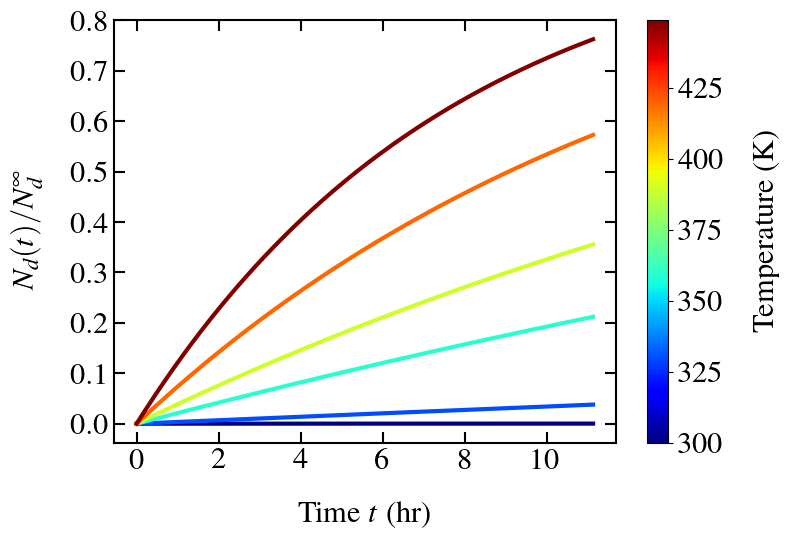

In [19]:
plt.figure(figsize=(8,5.5))
norm = mcolors.Normalize(vmin=min(temp_1e6[indices_uniform]), vmax=max(temp_1e6[indices_uniform]))

# Plot just the last mode occupation over time
#plt.plot(time, P, color='gold', label=r'$1\times 10^{6}$', linewidth=3)
for i in range(n):
    plt.plot(time/3600, P[i], color=colors[i], linewidth=3)

# Labels
plt.xlabel('Time $t$ (hr)', fontsize=22,labelpad=20)
plt.ylabel('$N_d(t)/N_d^{\infty}$', fontsize=22,labelpad=20)


# Plot formatting
#plt.legend(loc='best', fontsize=18, frameon=False)  # Move the legend to the top right and increase font size
plt.xticks(fontsize=22)  # Increase x-axis tick font size
plt.yticks(fontsize=22)  # Increase y-axis tick font size
#plt.ylim(-1,1)
#plt.xlim(3.5,10)
ax = plt.gca()
cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap='jet'), ax=plt.gca())
cbar.ax.tick_params(labelsize=22)
cbar.set_label("Temperature (K)", fontsize=22,labelpad=20)
ax.spines['top'].set_linewidth(1.5)   # Top border
ax.spines['right'].set_linewidth(1.5) # Right border
ax.spines['bottom'].set_linewidth(1.5)  # Bottom border (default width)
ax.spines['left'].set_linewidth(1.5)    # Left border (default width)
ax.tick_params(axis='both',  # Apply to both x and y axes
               which='minor',  # Apply to both major and minor ticks
               direction='in',  # Tick direction (inward and outward)
               width=1.5,  # Thickness of the tick marks
               length=4, # Length of the tick marks
               bottom=True, top=True, left=True, right=True)  
ax.tick_params(axis='both',  # Apply to both x and y axes
               which='major',  # Apply to both major and minor ticks
               direction='in',  # Tick direction (inward and outward)
               width=1.5,  # Thickness of the tick marks
               length=8, # Length of the tick marks
               bottom=True, top=True, left=True, right=True)  
#locmin = ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
#ax.yaxis.set_minor_locator(locmin)
#ax.xaxis.set_major_formatter(ticker.NullFormatter())
plt.tight_layout()
plt.savefig('FractionActivatedOverTime.png',dpi=1200)
plt.show()

I also want to generate a table for the $r$ values at $T = 300$ K (the first step) for each of the different fields to include in a table.

First step value for $6\times 10^{-3}$

In [145]:
(9.247829579431576e-13-2.6757359621926355e-12)/1.250000000000000E-004

-1.4007624033995823e-08

First step value for $1\times10^{5}$

In [4]:
(1.904633683532932e-12-2.6757359621926355e-12)/1.000000000000000E-003

-7.711022786597034e-10

First step value for $1\times10^{6}$

In [146]:
(exceedance[1]-exceedance[0])/time_1e6[1]

3.5871557950770414e-09

### Arrhenius analysis

Knowing that we could calculate the rate for each starting temperature made me think that it might be useful to plot those values over temperature to see if there's any discernable relationship. After playing with the data, I realized that there was indeed a relationship between the points and that they very nicely followed the Arrhenius equation that describes the rate that a process subject to a barrier occurs as a function of temperature. 

In our analysis, we do not include a single crossing point that would provide a barrier as in the 1D model or a NEB calculation, but it still seems like the system is well described by an effective activation barrier. I used scipy to fit the curve and extract an effective barrier of $E_{\text{a}} = 0.84$ eV and a release attempt rate of $r_0 = 1.6 \times 10^5$ s$^{-1}$.

In [8]:
rsAll = []
n = len(exceedance)-1
for i in range(n):
    r = (exceedance[i+1]-exceedance[i])/((time_1e6[i+1]-time_1e6[i])*(1-exceedance[i]))
    rsAll.append(r)
    
rsAll = np.array(rsAll)

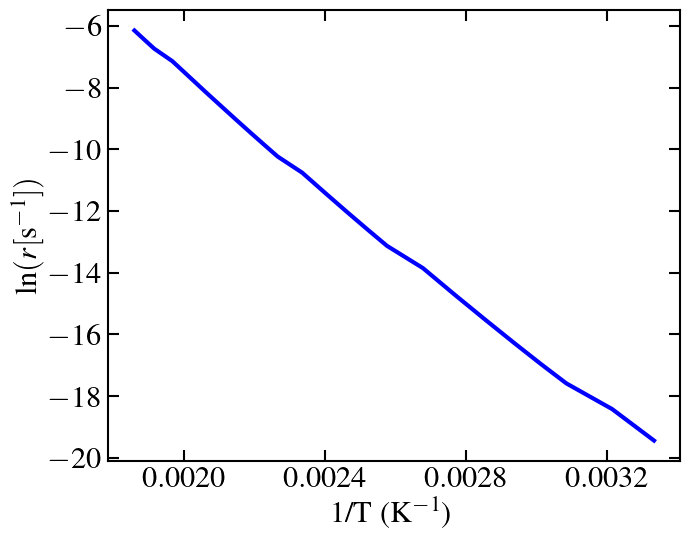

In [56]:
plt.figure(figsize=(7,5.5))

# Plot just the last mode occupation over time
plt.plot(1/temp_1e6[:-1], np.log(rsAll), color='blue', linewidth=3)
# Labels
plt.xlabel('1/T (K$^{-1}$)', fontsize=22)
plt.ylabel('$\ln(r [\mathrm{s}^{-1}])$ ', fontsize=22)

# Plot formatting
#plt.legend(loc='best', fontsize=18, frameon=False)  # Move the legend to the top right and increase font size
plt.xticks(fontsize=22)  # Increase x-axis tick font size
plt.yticks(fontsize=22)  # Increase y-axis tick font size
#plt.ylim(-1,1)
#plt.xlim(3.5,10)
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
ax.spines['top'].set_linewidth(1.5)   # Top border
ax.spines['right'].set_linewidth(1.5) # Right border
ax.spines['bottom'].set_linewidth(1.5)  # Bottom border (default width)
ax.spines['left'].set_linewidth(1.5)    # Left border (default width)
ax.tick_params(axis='both',  # Apply to both x and y axes
               which='minor',  # Apply to both major and minor ticks
               direction='in',  # Tick direction (inward and outward)
               width=1.5,  # Thickness of the tick marks
               length=4, # Length of the tick marks
               bottom=True, top=True, left=True, right=True)  
ax.tick_params(axis='both',  # Apply to both x and y axes
               which='major',  # Apply to both major and minor ticks
               direction='in',  # Tick direction (inward and outward)
               width=1.5,  # Thickness of the tick marks
               length=8, # Length of the tick marks
               bottom=True, top=True, left=True, right=True)  
#locmin = ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
#ax.yaxis.set_minor_locator(locmin)
#ax.xaxis.set_major_formatter(ticker.NullFormatter())
plt.tight_layout()
#plt.savefig('SiVH3_0th1st_posToNeut_20240229Laura.png',dpi=1200)
plt.show()

In [9]:
from scipy.optimize import curve_fit

In [10]:
kB = 8.61733e-5 # eV/K

def arrhenius(T, A, Ea):
    return A * np.exp(-Ea / (kB * T))

In [11]:
popt, pcov = curve_fit(arrhenius, temp_1e6[:-1], rsAll)

# Extract the fitted parameters
A_fitted, Ea_fitted = popt
print(f"Fitted pre-exponential factor (A): {A_fitted}")
print(f"Fitted activation energy (Ea): {Ea_fitted} eV")

# Plot the original data and the fitted curve
T_fit = np.linspace(min(temp_1e6[:-1]), max(temp_1e6[:-1]), 100)  # Temperature range for the fit line
rate_fit = arrhenius(T_fit, *popt)  # Fitted rates

Fitted pre-exponential factor (A): 160168.29894385644
Fitted activation energy (Ea): 0.8410859166057086 eV


/tmp/ipykernel_356/3125902017.py:4: RuntimeWarning: overflow encountered in exp
  return A * np.exp(-Ea / (kB * T))


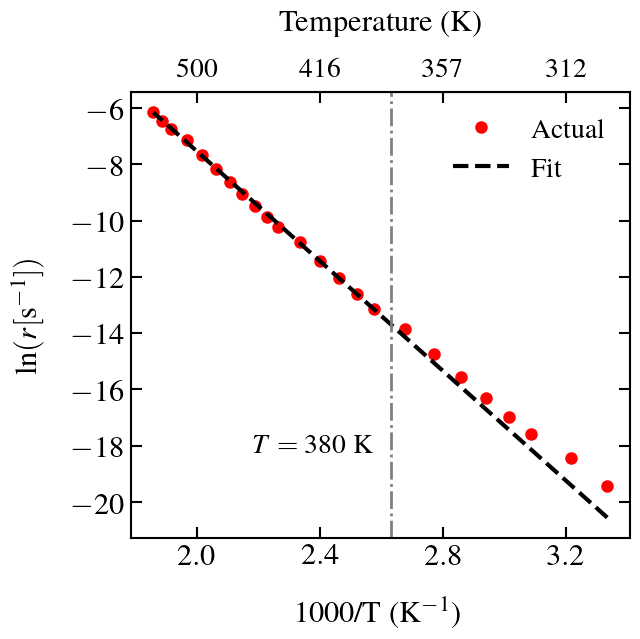

In [12]:
fig, ax_bottom = plt.subplots(figsize=(6.5,6.5))


# Plot just the last mode occupation over time
ax_bottom.plot(1/temp_1e6[:-1]*1e3, np.log(rsAll), color='red', label='Actual', linewidth=3, marker='.', linestyle='None',markersize=16)
ax_bottom.plot(1/T_fit*1e3, np.log(rate_fit), color='black', label='Fit', linewidth=3, linestyle='dashed')
# Labels
ax_bottom.set_xlabel('1000/T (K$^{-1}$)', fontsize=22,labelpad=20)
ax_bottom.set_ylabel('$\ln(r [\mathrm{s}^{-1}])$ ', fontsize=22,labelpad=20)

ax_top = ax_bottom.secondary_xaxis('top')
ax_top.set_xlabel("Temperature (K)", fontsize=22,labelpad=20)
ax_top.set_xticks([2.0, 2.4, 2.8, 3.2])  # Set specific tick marks
ax_top.set_xticklabels([f"{int(1/(x*1e-3))}" for x in ax_top.get_xticks()], fontsize=20)
ax_top.tick_params(top=False)

x_value = 1/380.0*1e3
plt.axvline(x=x_value, color='grey', linestyle='-.', linewidth=2)
plt.text(x_value-0.00045*1e3, -18, '$T = 380$ K', color='black', fontsize=20, verticalalignment='center')

# Plot formatting
plt.legend(loc='best', fontsize=20, frameon=False)  # Move the legend to the top right and increase font size
plt.xticks(fontsize=22)  # Increase x-axis tick font size
plt.yticks(fontsize=22)  # Increase y-axis tick font size
#plt.ylim(-1,1)
#plt.xlim(3.5,10)
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
ax.spines['top'].set_linewidth(1.5)   # Top border
ax.spines['right'].set_linewidth(1.5) # Right border
ax.spines['bottom'].set_linewidth(1.5)  # Bottom border (default width)
ax.spines['left'].set_linewidth(1.5)    # Left border (default width)
ax.tick_params(axis='both',  # Apply to both x and y axes
               which='minor',  # Apply to both major and minor ticks
               direction='in',  # Tick direction (inward and outward)
               width=1.5,  # Thickness of the tick marks
               length=4, # Length of the tick marks
               bottom=True, top=True, left=True, right=True)  
ax.tick_params(axis='both',  # Apply to both x and y axes
               which='major',  # Apply to both major and minor ticks
               direction='in',  # Tick direction (inward and outward)
               width=1.5,  # Thickness of the tick marks
               length=8, # Length of the tick marks
               bottom=True, top=True, left=True, right=True)  
#locmin = ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
#ax.yaxis.set_minor_locator(locmin)
#ax.xaxis.set_major_formatter(ticker.NullFormatter())
plt.tight_layout()
plt.savefig('Arrhenius.png',dpi=1200)
plt.show()